In [1]:
# imports

import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

from src.data_analysis.query_accuracy import query_accuracy

%matplotlib inline
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.figsize"] = [14, 8]
plt.style.use("ggplot")

celeba_paths = glob.glob("Datasets//CelebA_test//**//*.jpg", recursive=True)
celeba_denom = len(celeba_paths)

In [2]:
def get_results(method: str, dataset: str, anon_dataset: str):
    res = query_accuracy(
        evaluation_method=method,
        dataset=dataset,
        p_mech_suffix="",
        anonymized_dataset=anon_dataset,
    )
    return res


def get_rank_1(dataset: str, anon_dataset: str, denom=None):
    try:
        res = get_results("rank_k", dataset=dataset, anon_dataset=anon_dataset)
        if denom is None:
            return res["1"] / celeba_denom
        else:
            return res["1"] / denom
    except:
        return np.nan


def get_rank_50(dataset: str, anon_dataset: str):
    res = get_results("rank_k", dataset=dataset, anon_dataset=anon_dataset)
    return res["50"] / celeba_denom


def get_validation(dataset: str, anon_dataset: str):
    res = get_results("lfw_validation", dataset=dataset, anon_dataset=anon_dataset)
    return res / 3000


def get_utility_metric(metric: str, dataset: str, anon_dataset: str, denom=None):
    try:
        res = get_results("utility", dataset=dataset, anon_dataset=anon_dataset)
        if denom is None:
            return res[metric] / celeba_denom
        else:
            return res[metric] / denom
    except:
        return np.nan


In [3]:
def generate_row(title: str, suffix: str):
    rank_1 = get_rank_1("CelebA_test", f"CelebA_test_{suffix}")
    rank_50 = get_rank_50("CelebA_test", f"CelebA_test_{suffix}")
    val = get_validation("lfw", f"lfw_{suffix}")
    ssim = get_utility_metric("ssim", "CelebA_test", f"CelebA_test_{suffix}")
    age = get_utility_metric("age", "CelebA_test", f"CelebA_test_{suffix}")
    emotion = get_utility_metric("emotion", "CelebA_test", f"CelebA_test_{suffix}")
    race = get_utility_metric("race", "CelebA_test", f"CelebA_test_{suffix}")
    gender = get_utility_metric("gender", "CelebA_test", f"CelebA_test_{suffix}")

    return {
        "Method": title,
        r"Rank 1 (\%) $\downarrow$": rank_1 * 100,
        r"Rank 50 (\%) $\downarrow$": rank_50 * 100,
        r"Validation (\%) $\downarrow$": val * 100,
        r"SSIM $\uparrow$": ssim,
        r"Age (diff.) $\downarrow$": age,
        r"Race (\%) $\uparrow$": race * 100,
        r"Gender (\%) $\uparrow$": gender * 100,
        r"Emotion (\%) $\uparrow$": emotion * 100,
    }


def generate_row_anonghost(title: str, suffix: str):
    rank_1 = get_rank_1("CelebA_test", f"anonghost/CelebA_test_{suffix}")
    rank_50 = get_rank_50("CelebA_test", f"anonghost/CelebA_test_{suffix}")
    val = get_validation("lfw", f"anonghost/lfw_{suffix}")
    ssim = get_utility_metric("ssim", "CelebA_test", f"anonghost/CelebA_test_{suffix}")
    age = get_utility_metric("age", "CelebA_test", f"anonghost/CelebA_test_{suffix}")
    emotion = get_utility_metric(
        "emotion", "CelebA_test", f"anonghost/CelebA_test_{suffix}"
    )
    race = get_utility_metric("race", "CelebA_test", f"anonghost/CelebA_test_{suffix}")
    gender = get_utility_metric(
        "gender", "CelebA_test", f"anonghost/CelebA_test_{suffix}"
    )

    return {
        "Method": title,
        r"Rank 1 (\%) $\downarrow$": rank_1 * 100,
        r"Rank 50 (\%) $\downarrow$": rank_50 * 100,
        r"Validation (\%) $\downarrow$": val * 100,
        r"SSIM $\uparrow$": ssim,
        r"Age (diff.) $\downarrow$": age,
        r"Race (\%) $\uparrow$": race * 100,
        r"Gender (\%) $\uparrow$": gender * 100,
        r"Emotion (\%) $\uparrow$": emotion * 100,
    }


def generate_row_codec(title: str, suffix: str):
    rank_1 = get_rank_1("codec", f"codec_{suffix}", denom=256)
    ssim = get_utility_metric("ssim", "codec", f"codec_{suffix}", denom=256)
    age = get_utility_metric("age", "codec", f"codec_{suffix}", denom=256)
    emotion = get_utility_metric("emotion", "codec", f"codec_{suffix}", denom=256)
    race = get_utility_metric("race", "codec", f"codec_{suffix}", denom=256)
    gender = get_utility_metric("gender", "codec", f"codec_{suffix}", denom=256)

    return {
        "Method": title,
        r"Rank 1 (\%) $\downarrow$": rank_1 * 100,
        r"SSIM $\uparrow$": ssim,
        r"Age (diff.) $\downarrow$": age,
        r"Race (\%) $\uparrow$": race * 100,
        r"Gender (\%) $\uparrow$": gender * 100,
        r"Emotion (\%) $\uparrow$": emotion * 100,
    }

In [ ]:
# Generate a table for our method

eps = r"$\varepsilon$"
theta = r"$\theta$="
deg = r"$\degree$"

sources = [
    (r"\textbf{Rand. sampling}", "eps0_theta0"),
    (f"{eps}=1", "eps1_theta0"),
    (f"{eps}=10", "eps10_theta0"),
    (f"{eps}=100", "eps100_theta0"),
    (f"{eps}=1000", "eps1000_theta0"),
    (r"\textbf{Img. recon.}", "eps-1_theta0"),
    # (f"{theta}30{deg}", "eps-1_theta30"),
    (f"{theta}45{deg}", "eps-1_theta60"),
    (f"{theta}90{deg}", "eps-1_theta90"),
    (f"{theta}135{deg}", "eps-1_theta120"),
    (f"{theta}180{deg}", "eps-1_theta150"),
    # (f"{theta}180{deg}", "eps-1_theta180"),
]

records = []
for s in sources:
    records.append(generate_row_anonghost(s[0], s[1]))

baselines = [
    (r"PixelDP (strong)", "pixel_dp_eps1.0_b16"),
    (r"PixelDP (weak)", "pixel_dp_eps15.0_b4"),
    (r"MetricSVD (strong)", "metric_privacy_eps1.0_k4"),
    (r"MetricSVD (weak)", "metric_privacy_eps10.0_k8"),
    (r"IdentityDP ($\varepsilon = 1$)", "identity_dp_eps1.0"),
    (r"IdentityDP ($\varepsilon = 100$)", "identity_dp_eps100.0"),
]

for b in baselines:
    records.append(generate_row(b[0], b[1]))

df = pd.DataFrame.from_records(records)
latex_table = df.to_latex(
    float_format="%.2f", index=False, label="tab:anonghost_results_table"
)
print(latex_table)

In [ ]:
# Generate a table for simswap backend to compare against

eps = r"$\varepsilon$"
theta = r"$\theta$="
deg = r"$\degree$"

sources = [
    (r"\textbf{Rand. sampling}", "dtheta_privacy_theta0.0_eps0.0"),
    (f"{eps}=1", "dtheta_privacy_theta0.0_eps1.0"),
    (f"{eps}=10", "dtheta_privacy_theta0.0_eps10.0"),
    (f"{eps}=100", "dtheta_privacy_theta0.0_eps100.0"),
    (f"{eps}=1000", "dtheta_privacy_theta0.0_eps1000.0"),
    (r"\textbf{Img. reconst.}", "dtheta_privacy_theta0.0_eps-1.0"),
    (f"{theta}30{deg}", "dtheta_privacy_theta30.0_eps-1.0"),
    (f"{theta}45{deg}", "dtheta_privacy_theta45.0_eps-1.0"),
    (f"{theta}60{deg}", "dtheta_privacy_theta60.0_eps-1.0"),
    (f"{theta}90{deg}", "dtheta_privacy_theta90.0_eps-1.0"),
    (f"{theta}135{deg}", "dtheta_privacy_theta135.0_eps-1.0"),
    (f"{theta}180{deg}", "dtheta_privacy_theta180.0_eps-1.0"),
]

records = []
for s in sources:
    records.append(generate_row(s[0], s[1]))

df = pd.DataFrame.from_records(records)
latex_table = df.to_latex(
    float_format="%.2f", index=False, label="tab:simswap_results_table"
)
print(latex_table)

In [ ]:
# IdentityDP table

eps = r"$\varepsilon$"

sources = [
    (r"\textbf{Rand. sampling}", "dtheta_privacy_theta0.0_eps0.0"),
    (f"{eps}=1", "identity_dp_eps1.0"),
    (f"{eps}=10", "identity_dp_eps10.0"),
    (f"{eps}=50", "identity_dp_eps50.0"),
    (f"{eps}=100", "identity_dp_eps100.0"),
    (f"{eps}=200", "identity_dp_eps200.0"),
    (f"{eps}=400", "identity_dp_eps400.0"),
    (f"{eps}=600", "identity_dp_eps600.0"),
    (f"{eps}=800", "identity_dp_eps800.0"),
    (f"{eps}=1000", "identity_dp_eps1000.0"),
    (r"\textbf{Img. reconst.}", "dtheta_privacy_theta0.0_eps-1.0"),
]

records = []
for s in sources:
    records.append(generate_row(s[0], s[1]))

df = pd.DataFrame.from_records(records)
latex_table = df.to_latex(
    float_format="%.2f", index=False, label="tab:identitydp_results_table"
)
print(latex_table)

In [ ]:
# Codec avatar table

eps = r"$\varepsilon$"
theta = r"$\theta$="
deg = r"$\degree$"

sources = [
    (r"\textbf{Rand. sampling}", "eps0"),
    (f"{eps}=1", "eps1"),
    (f"{eps}=10", "eps10"),
    (f"{eps}=100", "eps100"),
    (r"\textbf{Img. reconst.}", "eps-1"),
    (f"{theta}45{deg}", "theta60"),
    (f"{theta}90{deg}", "theta90"),
    (f"{theta}135{deg}", "theta120"),
    (f"{theta}180{deg}", "theta150"),
    # (f"{theta}180{deg}", "theta180"),
]

records = []
for s in sources:
    records.append(generate_row_codec(s[0], s[1]))

df = pd.DataFrame.from_records(records)
latex_table = df.to_latex(
    float_format="%.2f", index=False, label="tab:codec_results_table"
)
print(latex_table)

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

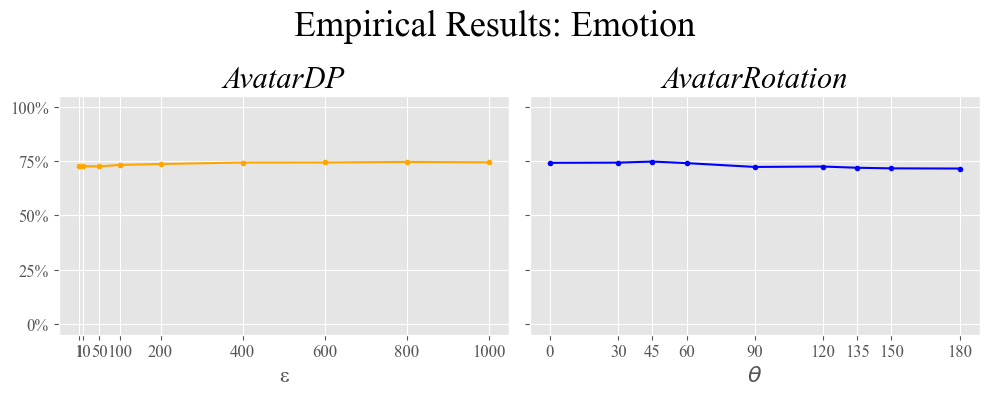

In [37]:
plt.rcParams["figure.figsize"] = [10, 4]


def inv_lin(x, a, b):
    return a * (1 / np.asarray(x)) + b


def nat_log(x, a, b):
    return a * np.log(x) + b


def lin(x, a, b):
    return a * x + b


eps_list = [1, 10, 50, 100, 200, 400, 600, 800, 1000]
theta_list = [0, 30, 45, 60, 90, 120, 135, 150, 180]

for metric in ["Rank 1", "Validation", "Age", "Race", "Gender", "SSIM", "Emotion"]:
    plt.clf()

    met1 = []
    met2 = []

    for eps in eps_list:
        if metric == "Rank 1":
            met1.append(
                get_rank_1(
                    "CelebA_test", f"CelebA_test_dtheta_privacy_theta0.0_eps{eps:.1f}"
                )
            )
        elif metric == "Validation":
            met1.append(
                get_validation("lfw", f"lfw_dtheta_privacy_theta0.0_eps{eps:.1f}")
            )
        else:
            met1.append(
                get_utility_metric(
                    metric.lower(),
                    "CelebA_test",
                    f"CelebA_test_dtheta_privacy_theta0.0_eps{eps:.1f}",
                )
            )
    for theta in theta_list:
        if metric == "Rank 1":
            met2.append(
                get_rank_1(
                    "CelebA_test",
                    f"CelebA_test_dtheta_privacy_theta{theta:.1f}_eps-1.0",
                )
            )
        elif metric == "Validation":
            met2.append(
                get_validation("lfw", f"lfw_dtheta_privacy_theta{theta:.1f}_eps-1.0")
            )
        else:
            met2.append(
                get_utility_metric(
                    metric.lower(),
                    "CelebA_test",
                    f"CelebA_test_dtheta_privacy_theta{theta:.1f}_eps-1.0",
                )
            )

    fig, ax = plt.subplots(1, 2)

    ax[0].plot(eps_list, met1, marker=".", c="orange")
    ax[1].plot(theta_list, met2, marker=".", c="b")
    ax[0].set_xticks(eps_list, eps_list, fontsize=12)
    ax[1].set_xticks(theta_list, theta_list, fontsize=12)
    ax[0].set_title("AvatarDP", fontsize=22, style="italic")
    ax[0].set_xlabel("ε", fontsize=16)
    ax[1].set_title("AvatarRotation", fontsize=22, style="italic")
    ax[1].set_xlabel(r"$\theta$", fontsize=16)

    if metric not in ["SSIM", "Age"]:
        ax[0].set_ylim([-0.05, 1.05])
        ax[0].set_yticks(
            [0, 0.25, 0.5, 0.75, 1], ["0%", "25%", "50%", "75%", "100%"], fontsize=12
        )
        ax[1].set_ylim([-0.05, 1.05])
        ax[1].set_yticks(
            [0, 0.25, 0.5, 0.75, 1], [], fontsize=12
        )  # [0, 0.25, 0.5, 0.75, 1], ["0%", "25%", "50%", "75%", "100%"])
    elif metric == "SSIM":
        ax[0].set_ylim([-0.05, 1.05])
        ax[0].set_yticks([0, 0.25, 0.5, 0.75, 1], [0, 0.25, 0.5, 0.75, 1], fontsize=12)
        ax[1].set_ylim([-0.05, 1.05])
        ax[1].set_yticks(
            [0, 0.25, 0.5, 0.75, 1], [], fontsize=12
        )  # [0, 0.25, 0.5, 0.75, 1], ["0%", "25%", "50%", "75%", "100%"])
    elif metric == "Age":
        ax[0].set_ylim([-0.05, 6.05])
        ax[0].set_yticks([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6], fontsize=12)
        ax[0].set_ylabel("Years")
        ax[1].set_ylim([-0.05, 1.05])
        ax[1].set_yticks(
            [0, 1, 2, 3, 4, 5, 6], [], fontsize=12
        )  # [0, 0.25, 0.5, 0.75, 1], ["0%", "25%", "50%", "75%", "100%"])

    plt.suptitle(f"Empirical Results: {metric}", fontsize=26)
    plt.tight_layout()
    plt.savefig(f"figures/{metric}_lineplot.png")

In [8]:
eps_list = [1, 10, 50, 100, 200, 400, 600, 800, 1000]
# eps_list = [1, 10, 100, 1000]

dtheta_priv, idp_priv, dtheta_gend, idp_gend, dtheta_race, idp_race = (
    [],
    [],
    [],
    [],
    [],
    [],
)

for eps in eps_list:
    dtheta_priv.append(
        get_rank_1("CelebA_test", f"CelebA_test_dtheta_privacy_theta0.0_eps{eps:.1f}")
    )
    dtheta_gend.append(
        get_utility_metric(
            "gender", "CelebA_test", f"CelebA_test_dtheta_privacy_theta0.0_eps{eps:.1f}"
        )
    )
    dtheta_race.append(
        get_utility_metric(
            "race", "CelebA_test", f"CelebA_test_dtheta_privacy_theta0.0_eps{eps:.1f}"
        )
    )

    idp_priv.append(get_rank_1("CelebA_test", f"CelebA_test_identity_dp_eps{eps:.1f}"))
    idp_gend.append(
        get_utility_metric(
            "gender", "CelebA_test", f"CelebA_test_identity_dp_eps{eps:.1f}"
        )
    )
    idp_race.append(
        get_utility_metric(
            "race", "CelebA_test", f"CelebA_test_identity_dp_eps{eps:.1f}"
        )
    )

In [ ]:
plt.rcParams["figure.figsize"] = [10, 4]


def inv_lin(x, a, b):
    return a * (1 / np.asarray(x)) + b


def nat_log(x, a, b):
    return a * np.log(x) + b


def lin(x, a, b):
    return a * x + b


eps_list = [1, 10, 50, 100, 200, 400, 600, 800, 1000]


fig, ax = plt.subplots(1, 2)

ax[0].plot(eps_list, dtheta_priv, label=r"$\it{AvatarDP}$", c="r", marker=".")
ax[0].plot(eps_list, idp_priv, label="IdentityDP", c="b", marker=".")

# ax[0].plot(
#     np.linspace(0, 1000, 1001),
#     lin(np.linspace(0, 1000, 1001), 0.00066, 0.15),
#     c="m",
#     linestyle="dashed",
#     alpha=0.75,
#     label="Linear",
# )

# da_vals = np.linspace(0, 1200, 1201)
# da_vals[0:10] = np.nan
# ax[0].plot(
#     da_vals - 10,
#     # inv_lin(da_vals, -70, 0.9),
#     # da_vals,
#     nat_log(da_vals, 0.17, -0.3),
#     c="gray",
#     linestyle="dashed",
#     alpha=0.75,
#     label="ln(x)",
# )

ax[1].plot([np.nan], [np.nan], label="Gender", c="k", marker=".")
ax[1].plot(eps_list, dtheta_gend, c="r", marker=".", alpha=0.5)
ax[1].plot(eps_list, idp_gend, c="b", marker=".", alpha=0.5)

ax[1].plot([np.nan], [np.nan], label="Race", c="k", marker=".", linestyle="dashed")
ax[1].plot(eps_list, dtheta_race, c="r", marker=".", linestyle="dashed", alpha=0.5)
ax[1].plot(eps_list, idp_race, c="b", marker=".", linestyle="dashed", alpha=0.5)

ax[0].set_ylim([-0.05, 1.05])
ax[0].set_yticks(
    [0, 0.25, 0.5, 0.75, 1], ["0%", "25%", "50%", "75%", "100%"], fontsize=12
)
# ax[0].set_xlim([-15, 1015])
ax[0].set_xticks(eps_list, eps_list, fontsize=12)

ax[1].set_ylim([-0.05, 1.05])
ax[1].set_yticks(
    [0, 0.25, 0.5, 0.75, 1], [], fontsize=12
)  # [0, 0.25, 0.5, 0.75, 1], ["0%", "25%", "50%", "75%", "100%"])
ax[1].set_xlim([-15, 1015])
ax[1].set_xticks(eps_list, eps_list, fontsize=12)

ax[0].set_title("Rank 1 (%)", fontsize=22)
ax[0].set_xlabel("ε", fontsize=16)
ax[1].set_title("Utility (%)", fontsize=22)
ax[1].set_xlabel("ε", fontsize=16)


ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats

plt.rcParams["figure.figsize"] = [10, 4]
plt.rcParams["text.usetex"] = False


eps_list = [1, 10, 50, 100, 200, 400, 600, 800, 1000]

dtheta_sims, idp_sims = [], []
for eps in eps_list:
    try:
        df = pd.read_csv(
            f"Results/Privacy/rank_k/CelebA_test_dtheta_privacy_theta0.0_eps{eps}.0.csv"
        )
        dtheta_sims.append(list(1 - df["similarity"]))

        df = pd.read_csv(
            f"Results/Privacy/rank_k/CelebA_test_identity_dp_eps{eps}.0.csv"
        )
        idp_sims.append(list(1 - df["similarity"]))
    except:
        print(f"skip {eps}")

p_values = []
for i in range(len(idp_sims)):
    statistic, p_value = stats.levene(dtheta_sims[i], idp_sims[i])
    print(f"----\ncomparing eps={eps_list[i]}")
    print(f"statistic: {statistic}")
    print(f"p_value: {p_value}")
    p_values.append(p_value)


xticks1 = np.asarray([1.25 * i + 1 for i in range(len(dtheta_sims))])
xticks2 = np.asarray([1.25 * i + 1 for i in range(len(idp_sims))])

for row in dtheta_sims:
    for i in range(len(row)):
        row[i] = np.arccos(row[i]) * 180 / np.pi
for row in idp_sims:
    for i in range(len(row)):
        row[i] = np.arccos(row[i]) * 180 / np.pi


vp1 = plt.violinplot(
    dtheta_sims, positions=xticks1 - 0.25, showmeans=True, showextrema=False
)
vp2 = plt.violinplot(
    idp_sims, positions=xticks2 + 0.25, showmeans=True, showextrema=False
)

plt.legend(
    [vp1["bodies"][0], vp2["bodies"][0]],
    [r"$\it{AvatarDP}$", "IdentityDP"],
    loc=3,
    fontsize=20,
)


for i in range(len(p_values)):
    symb = ""
    if p_values[i] < 0.0005:
        symb = "***"
    elif p_values[i] < 0.005:
        symb = "**"
    elif p_values[i] < 0.05:
        symb = "*"

    plt.text(xticks1[i], 95, symb, fontsize=18, ha="center", va="center")

plt.yticks(
    [15, 30, 45, 60, 75, 90, 105],
    [
        r"15$\degree$",
        r"30$\degree$",
        r"45$\degree$",
        r"60$\degree$",
        r"75$\degree$",
        r"90$\degree$",
        r"105$\degree$",
    ],
    fontsize=14,
)
plt.ylabel(r"$\theta \ \equiv \ d_{\angle}(x_{id}, x_{id}')$", fontsize=20)
# plt.ylim([-0.1, 1])
plt.xticks(xticks1, eps_list[0 : len(dtheta_sims)], fontsize=14)
plt.xlabel("ε", fontsize=20)

plt.tight_layout()
plt.show()


In [ ]:
# do a test comparison between ours and identitydp

from src.anonymization import anonymize
from src.privacy_mechanisms.simswap.identity_dp import calculate_sensitivity


def cos_sim(A, B):
    try:
        A = A.squeeze()
        B = B.squeeze()
        return 1 - np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))
    except:
        return 2


eps_list = [1, 10, 100, 1000]
dims = 512
n_samples = 512

start_vector = np.random.uniform(low=-1, high=1, size=dims)
start_vector /= np.linalg.norm(start_vector)
start_vector = start_vector.squeeze()

ours_vectors, idp_vectors = [], []

for eps in tqdm.tqdm(eps_list):
    for i in range(n_samples):
        ours_vector = np.copy(start_vector)
        ours_vector = anonymize(ours_vector, epsilon=eps, theta=0, dims=dims)
        ours_vector /= np.linalg.norm(ours_vector)

        ours_vectors.append(ours_vector.squeeze())

        idp_vector = np.copy(start_vector)
        sensitivity = calculate_sensitivity()
        sens = sensitivity["sensitivity"]  ##  / 512.0
        noise = np.random.laplace(loc=0, scale=sens / eps + 1e-8, size=idp_vector.shape)
        idp_vector = idp_vector + noise
        idp_vector = idp_vector / np.linalg.norm(idp_vector)

        idp_vectors.append(idp_vector.squeeze())


In [ ]:
from sklearn.manifold import TSNE

populating_samples = []
for _ in tqdm.tqdm(range(n_samples * 8)):
    s = np.random.uniform(low=-1, high=1, size=dims)
    s /= np.linalg.norm(s)
    populating_samples.append(s.squeeze())

X = ours_vectors + idp_vectors + populating_samples + [start_vector]
X = np.stack(X)
# X = X - np.stack([start_vector for _ in range((8 * n_samples) + (2 * n_samples * len(eps_list)) + 1)])
X_embedded = TSNE(
    n_components=3,
    learning_rate="auto",
    init="random",
    perplexity=30,
    metric="cosine",
).fit_transform(X)


In [ ]:
eps_list = [1, 10, 100, 1000]

z = len(eps_list)


plt.rcParams["figure.figsize"] = [8, 4]

fig, ax = plt.subplots(2, z, subplot_kw=dict(projection="3d"))

cols = ["r", "g", "b", "m"]


for i in range(z):
    ax[0, i].scatter(
        X_embedded[i * n_samples : (i + 1) * n_samples, 0],
        X_embedded[i * n_samples : (i + 1) * n_samples, 1],
        X_embedded[i * n_samples : (i + 1) * n_samples, 2],
        label=eps_list[i],
        color=cols[i],
        alpha=0.1,
        s=10,
    )

    ax[1, i].scatter(
        X_embedded[(z + i) * n_samples : (z + i + 1) * n_samples, 0],
        X_embedded[(z + i) * n_samples : (z + i + 1) * n_samples, 1],
        X_embedded[(z + i) * n_samples : (z + i + 1) * n_samples, 2],
        label=eps_list[i],
        color=cols[i],
        alpha=0.1,
        s=10,
    )

    b = 50

    for j in [0, 1]:
        ax[j, i].scatter(
            [X_embedded[-1, 0]],
            [X_embedded[-1, 1]],
            [X_embedded[-1, 2]],
            marker="+",
            s=40,
            color="k",
        )
        ax[j, i].set_xlim([-b, b])
        ax[j, i].set_xticks([])
        ax[j, i].set_ylim([-b, b])
        ax[j, i].set_yticks([])
        ax[j, i].set_zlim([-b, b])
        ax[j, i].set_zticks([])

ax[0, 0].text2D(
    0,
    0.5,
    "AvatarDP",
    style="italic",
    transform=ax[0, 0].transAxes,
    rotation="vertical",
    va="center",
    size="xx-large",
)
ax[1, 0].text2D(
    0,
    0.5,
    "IdentityDP",
    transform=ax[1, 0].transAxes,
    rotation="vertical",
    va="center",
    size="xx-large",
)
ax[0, 0].text2D(
    0.5, -0.15, "ε = 1", ha="center", transform=ax[0, 0].transAxes, size="xx-large"
)
ax[0, 1].text2D(
    0.5, -0.15, "ε = 10", ha="center", transform=ax[0, 1].transAxes, size="xx-large"
)
ax[0, 2].text2D(
    0.5, -0.15, "ε = 100", ha="center", transform=ax[0, 2].transAxes, size="xx-large"
)
ax[0, 3].text2D(
    0.5, -0.15, "ε = 1000", ha="center", transform=ax[0, 3].transAxes, size="xx-large"
)


plt.tight_layout()
plt.show()